In [35]:
import fairbench as fb

In [36]:
test, y, yhat = fb.demos.adult()
scores = fb.demos.adult(predict="probabilities")[2]

In [69]:
sensitive = fb.Fork(fb.categories@test[9], fb.categories@test[8]).intersectional()
sensitive

Asian-Pac-Islander,[0 0 0 ... 0 1 0]
Black,[1 0 0 ... 0 0 0]
Other,[0 0 0 ... 0 0 0]
White,[0 1 1 ... 1 0 1]
Amer-Indian-Eskimo,[0 0 0 ... 0 0 0]
Female,[0 0 0 ... 0 0 0]
Female&Asian-Pac-Islander,[0 0 0 ... 0 0 0]
Female&Black,[0 0 0 ... 0 0 0]
Female&Other,[0 0 0 ... 0 0 0]
Female&White,[0 0 0 ... 0 0 0]
Female&Amer-Indian-Eskimo,[0 0 0 ... 0 0 0]


In [70]:
fb.binreport(predictions=yhat, labels=y, sensitive=sensitive)

accuracy,0.865
prule,0.597283599046825
dfpr,-0.20334865397242283
dfnr,0.00961932878461369
accuracy,0.899
prule,0.4331748088715828
dfpr,0.08228216082307444
dfnr,-0.05494272424581076
accuracy,0.917
prule,0.2116387709158066
dfpr,-0.04310310647661719


In [71]:
report = fb.multireport(predictions=yhat, labels=y, sensitive=sensitive)
report

accuracy,0.783
pr,0.015
tpr,0.000
tnr,0.827
accuracy,0.838
pr,0.188
tpr,0.701
tnr,0.866
accuracy,0.822
pr,0.043
tpr,0.000


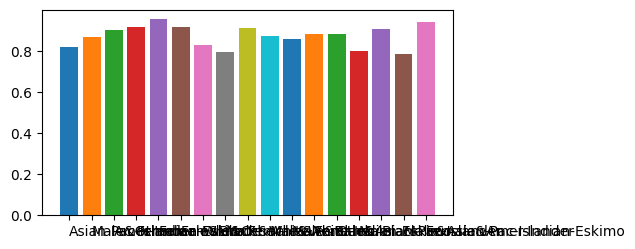

In [74]:
fb.visualize(report.min.accuracy.explain)

In [73]:
fb.interactive(report, port=8890, height=200)

Loading BokehJS ...

In [63]:
fb.stamps.prule(report)

{'p-rule': 0.2116387709158066}

In [64]:
stamps = fb.combine(
    fb.stamps.prule(report),
    fb.stamps.accuracy(report),
    fb.stamps.four_fifths(report)
)
stamps

p-rule,0.212
worst accuracy,0.799
4/5 rule,False


In [65]:
fb.modelcards.tohtml(stamps, show=True)

'<h2>Factors</h2><ul><li>The groups that are considered for fairness assessment are Female, Male.</li></ul><h2>Metrics</h2><ul><li>Fairness-aware metrics are computed. The <em>p-rule</em> compares the fraction of positive predictions between groups. The worst ratio is reported, so that value of 0 indicates disparate impact, and value of 1 disparate impact mitigation. The <em>worst accuracy</em> computes the worst performance among protected groups; this is the minimum benefit the system brings to any group. The <em>4/5 rule</em> checks whether the fraction of positive predictions for each protected group is at worst four fifths that of any other group (i.e., the p-rule is 0.8 or greater). </li></ul>\n<h2>Evaluation Results</h2>\n<table>\n<tr><th>Metric</th><th>Value</th></tr>\n<tr><td>p-rule</td><td>0.212</td></tr>\n<tr><td>worst accuracy</td><td>0.799</td></tr>\n<tr><td>4/5 rule</td><td>&#10060;</td></tr>\n</table><h2>Caveats and Recommendations</h2><ul><li>Consider input from affecte